<a href="https://colab.research.google.com/github/JacobHaines/Math311_Linear_Algebra_Projects/blob/main/The_Ski_Hill_Transition_Matrices_and_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialize the preliminary code:


In [4]:
import numpy as np
from numpy import c_

ll = "loaded"

The local downhill ski organization wants to know the usage rate for their four different ski runs. A consultant watched skiers one morning and tracked where they went after each run from the Bunny hill, Green triangle, Double black diamon, and Mogul runs. The information is summarized below:

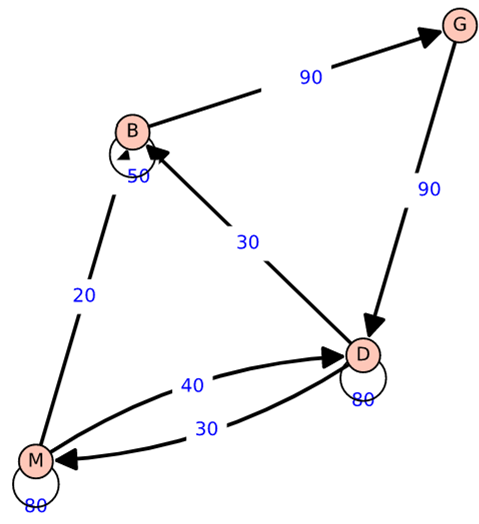

The Chalet wants to put up advertising targeting the most number of skiers for their daily lunch special. Using the information above, develop a model that tracks skiers on the runs during the day.

Note: The data was collected on a Monday morning, a day when not very many people are skiing. There are usually 980 skiers who leave the Chalet and start at the bunny hill on a typical weekend morning.

# Prepare a model

We construct a matrix equation model $$ M x_0 = x_1 $$ for the system. Although there were 140 people on the bunny hill when the data was collected, assume there were 980 skiers that start at the bunny hill.

In [5]:
# create the matrix M:
M = np.matrix([[50/140, 0, 30/140, 20/140],
               [90/140, 0, 0,      0],
               [0,      1, 80/140, 40/140],
               [0,      0, 30/140, 80/140]])
M

matrix([[0.35714286, 0.        , 0.21428571, 0.14285714],
        [0.64285714, 0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.57142857, 0.28571429],
        [0.        , 0.        , 0.21428571, 0.57142857]])

In [6]:
x0 = np.matrix([[1], [2], [3], [4]])
x0

matrix([[1],
        [2],
        [3],
        [4]])

In [7]:
M*x0


matrix([[1.57142857],
        [0.64285714],
        [4.85714286],
        [2.92857143]])

#Question #5:
Assume 980 skiers start skiing at 8:00am on a Saturday.  All skiers must start on the Bunny Hill, so we coudl represent this as a vector  (e.g. $$ \vec{x}_0 = \left( \begin{array}{c} 980 \\ 0 \\ 0 \\ 0 \\ \end{array} \right) $$

Modify the code below to determine where skiers go on the following runs:

Run                  | Run 0 | Run 1 | Run 2 | Run 3 | Run 4 | Run 5 | Run 10 | Run 15
---                  |  ---  |---   |  ---  |  ---  |  ---  |  ---  |   ---  |   ---
Bunny Hill           |  980  |       |       |       |       |       |        |       
Green Triangle       |   0   |       |       |       |       |       |        |     
Double Black Diamond |   0   |       |       |       |       |       |        |
Moguls               |   0   |       |       |       |       |       |        |




In [8]:
# Compute where skiers are after one ski run:

M*x0

matrix([[1.57142857],
        [0.64285714],
        [4.85714286],
        [2.92857143]])

In [9]:
#  We can take powers of M using the ** operator.

#  So, M**2  * x0 is the same as  M * M * x0

M ** 2  * x0

matrix([[2.02040816],
        [1.01020408],
        [4.25510204],
        [2.71428571]])

In [10]:
#  The initial state of the system:
x0 = np.matrix([[980], [0], [0], [0]])

#Make a matrix, where each column is the result
#of applying the matrix multiple times to the initial state x0:

X = np.c_[x0, M*x0, M**2 * x0, M**3 * x0, M**4 * x0, M**5 * x0, M**10 * x0, M**15 * x0]

#print out the X matrix, rounding the entries to 2 decimal places
print(X.round(2))


[[980.   350.   125.   179.64 208.8  200.62 195.31 195.3 ]
 [  0.   630.   225.    80.36 115.48 134.23 125.64 125.55]
 [  0.     0.   630.   585.   453.21 432.32 439.48 439.43]
 [  0.     0.     0.   135.   202.5  212.83 219.57 219.71]]


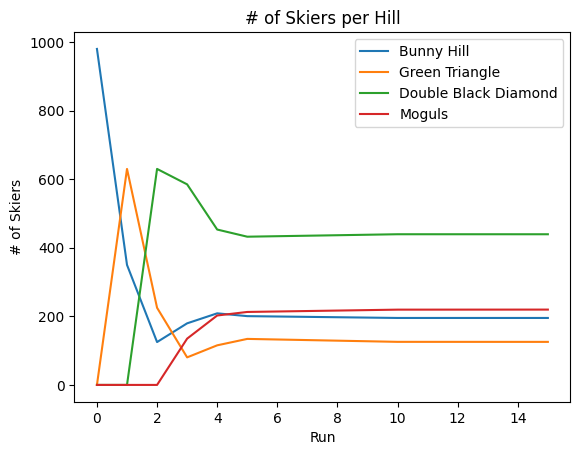

In [11]:
import matplotlib.pyplot as plt

x  = [0, 1, 2, 3, 4, 5, 10, 15]
plt.plot(x, np.array(X[0])[0], label="Bunny Hill")
plt.plot(x, np.array(X[1])[0], label="Green Triangle")
plt.plot(x, np.array(X[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(X[3])[0], label="Moguls")
plt.plot()

plt.xlabel("Run")  # Update this label
plt.ylabel("# of Skiers")  # Update this label
plt.title("# of Skiers per Hill")  # Update the title
plt.legend()
plt.show()

# Question 6:

Each ski run and chair lift ride takes approximately 12 minutes.  Where should the Chalet place their billboard to reacch the maximum number of skiers just before lunch?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.

In [12]:
#  The initial state of the system:
x0 = np.matrix([[980], [0], [0], [0]])

#Make a matrix, where each column is the result
#of applying the matrix multiple times to the initial state x0:

Q6 = np.c_[M**18 * x0]

#print out the X matrix, rounding the entries to 2 decimal places
print(Q6.round(2))

[[195.3 ]
 [125.55]
 [439.43]
 [219.72]]


In [13]:
M*M

matrix([[0.12755102, 0.21428571, 0.22959184, 0.19387755],
        [0.22959184, 0.        , 0.1377551 , 0.09183673],
        [0.64285714, 0.57142857, 0.3877551 , 0.32653061],
        [0.        , 0.21428571, 0.24489796, 0.3877551 ]])

# Question 7:

Does our answer change if the skiers were able to do one more run in the morning than you had estimated?

Insert your code to answer this question.  Be sure to explain your reasoning with your answer in the packet.


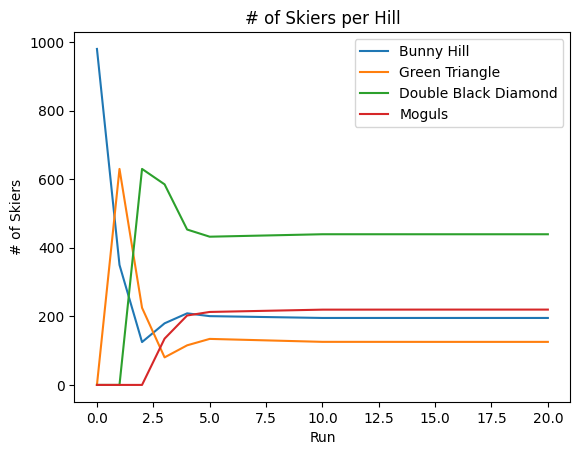

In [14]:
import matplotlib.pyplot as plt
X2 = np.c_[x0, M*x0, M**2 * x0, M**3 * x0, M**4 * x0, M**5 * x0, M**10 * x0, M**15 * x0, M**18 * x0]

x  = [0, 1, 2, 3, 4, 5, 10, 15, 20]
plt.plot(x, np.array(X2[0])[0], label="Bunny Hill")
plt.plot(x, np.array(X2[1])[0], label="Green Triangle")
plt.plot(x, np.array(X2[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(X2[3])[0], label="Moguls")
plt.plot()

plt.xlabel("Run")  # Update this label
plt.ylabel("# of Skiers")  # Update this label
plt.title("# of Skiers per Hill")  # Update the title
plt.legend()
plt.show()

#Homework for Markov Chanins and Skiing

Answer the following two situations on the printed homework.  The questions are copied here for your convenience - but you will turn in your homework pages with your answers written on those pages.

## Situation 1:  

We use the same set-up as the previous ski problem, except that we assume these changes to the initial data used to form matrix $M$:

* After each run, 20 skiers from the Green Triangle head to the Chalet instead of to the Double Black Diamond.
* After each run, 30 skiers from the Double Black Diamond go to the Chalet instead of going back to the Double Black Diamond run.
* On each run, all skiers leaving the lodge go to the Bunny Hill.


## HW 1:

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

In [15]:
# create the matrix M:
HW1 = np.matrix([[50/140, 0, 30/140, 20/140, 50/50],
               [90/140, 0, 0, 0, 0],
               [0, 70/90, 50/140, 40/140, 0],
               [0, 0, 30/140, 80/140, 0],
               [0, 20/90, 30/140, 0, 0]])

**The new matrix has an additional column to represent the Chalet. We also redirected the people going to and currently at the Black Diamond to the Chalet.**

## HW 2:

Long term, did changing the system affect which ski run was most popular?

Note:  It may be helpful to copy some of the code from above to answer this question.

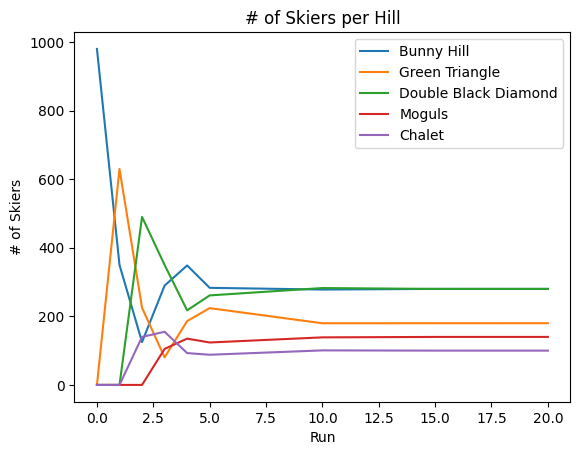

In [16]:
import matplotlib.pyplot as plt
x0_2 = np.matrix([[980], [0], [0], [0], [0]])
HW2 = np.c_[x0_2, HW1*x0_2, HW1**2 * x0_2, HW1**3 * x0_2, HW1**4 * x0_2, HW1**5 * x0_2, HW1**10 * x0_2, HW1**15 * x0_2, HW1**20 * x0_2]

x  = [0, 1, 2, 3, 4, 5, 10, 15, 20]
plt.plot(x, np.array(HW2[0])[0], label="Bunny Hill")
plt.plot(x, np.array(HW2[1])[0], label="Green Triangle")
plt.plot(x, np.array(HW2[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(HW2[3])[0], label="Moguls")
plt.plot(x, np.array(HW2[4])[0], label="Chalet")
plt.plot()

plt.xlabel("Run")  # Update this label
plt.ylabel("# of Skiers")  # Update this label
plt.title("# of Skiers per Hill")  # Update the title
plt.legend()
plt.show()

**It's hard to tell by looking at the graph which one between the Bunny Hill and the Double Black Diamond is the most popular.**

In [17]:
HW1**20 * x0_2

matrix([[280.00723302],
        [180.00529914],
        [279.99032744],
        [139.99991622],
        [ 99.99722419]])

**It looks like it's the Bunny Hill that is the most popular.**

In [18]:
280.00723302 - 279.99032744

0.016905580000013742

# Situation 2:  

People who enter the ski lodge don't return immediately to the Bunny Hill. Instead, they get hot chocolate and sit for, in effect, 3 ski runs. In this situation, where do most people spend their time during a day of skiing?

## HW 3:  

What is your new matrix system for this modification?  Give your new system and explain how you modified your old system to fit this new situation.

In [19]:
# create the matrix M:
HW3 = np.matrix([[50/140,   0,      30/140,  20/140,  0,      0,      0,      50/50],
               [  90/140,   0,      0,       0,       0,      0,      0,      0],
               [  0,        70/90,  50/140,  40/140,  0,      0,      0,      0],
               [  0,        0,      30/140,  80/140,  0,      0,      0,      0],
               [  0,        20/90,  30/140,  0,       0,      0,      0,      0],
               [  0,        0,      0,       0,       50/50,  0,      0,      0],
               [  0,        0,      0,       0,       0,      50/50,  0,      0],
               [  0,        0,      0,       0,       0,      0,      50/50,  0]])

**The new matrix includes 3 new states of the Chalet, one for each run that it takes for the skiers to enjoy their hot chocolate. The skiers who arrive at the Chalet spend the next run moving to another column that represents the same Chalet. This is repeated two more times before they go to the bunny hill.**

## HW 4:

Long term, did changing the system affect which ski run was most popular?

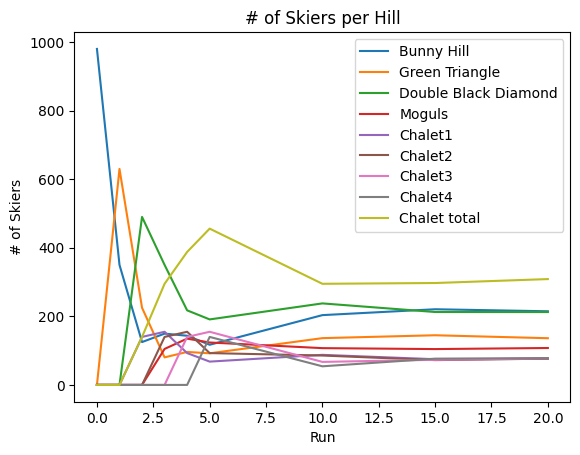

In [20]:
import matplotlib.pyplot as plt
x0_3 = np.matrix([[980], [0], [0], [0], [0], [0], [0], [0]])
HW4 = np.c_[x0_3, HW3*x0_3, HW3**2 * x0_3, HW3**3 * x0_3, HW3**4 * x0_3, HW3**5 * x0_3, HW3**10 * x0_3, HW3**15 * x0_3, HW3**20 * x0_3]

x  = [0, 1, 2, 3, 4, 5, 10, 15, 20]
plt.plot(x, np.array(HW4[0])[0], label="Bunny Hill")
plt.plot(x, np.array(HW4[1])[0], label="Green Triangle")
plt.plot(x, np.array(HW4[2])[0], label="Double Black Diamond")
plt.plot(x, np.array(HW4[3])[0], label="Moguls")
plt.plot(x, np.array(HW4[4])[0], label="Chalet1")
plt.plot(x, np.array(HW4[5])[0], label="Chalet2")
plt.plot(x, np.array(HW4[6])[0], label="Chalet3")
plt.plot(x, np.array(HW4[7])[0], label="Chalet4")
plt.plot(x, np.array(HW4[4])[0] + np.array(HW4[5])[0] + np.array(HW4[6])[0] + np.array(HW4[7])[0], label="Chalet total")
plt.plot()

plt.xlabel("Run")  # Update this label
plt.ylabel("# of Skiers")  # Update this label
plt.title("# of Skiers per Hill")  # Update the title
plt.legend()
plt.show()

**It does not look like it changed which ski hill is the most popular. The Bunny hill still barely beats out the Double Black Diamond. However, if we sum the total number of people at the Chalet, once things are in full swing, we see that it is the Chalet that has the most people at any given time.**

In [21]:
HW3**20 * x0_3

matrix([[214.81303472],
        [136.23851433],
        [212.56261439],
        [107.69120182],
        [ 75.96283292],
        [ 76.72450564],
        [ 77.66040345],
        [ 78.34689273]])

In [22]:
# number of people at the Chalet
75.96283292 + 76.72450564 + 77.66040345 + 78.34689273

308.69463473999997

# Situation 3:

## Markov Chains and Transformation Matrix Project:

**The Problem:** The dynamics of infection and the spread of an epidemic can be modeled using a linear dynamical system. (More sophisticated nonlinear epidemic dynamic models are also used.) In this section we describe a simple example.

A disease is introduced into a population. In each period (say, days) we count the fraction of the population tht is in four different infection states:
  * *Susceptible.* These individuals can acquire the disease the next day
  * *Infected.* These individuals have the disease.
  * *Recovered* (and immune). These individuals had the disease and survived, and now have immunity
  * *Deceased.* These individuals had the disease, and unfortunately died from it.

We denote the fractions of each of these as a 4-vector $x_t$, so, for example, $x_t = (0.75, 0.10, 0.10, 0.05)$ means that in day $t$, 75% of the population is susceptible, 10% is infected, 10% is recovered and immune, and 5% has died from the disease.

There are many mathematical models that predict how the disease state fractions $x_t$ evolve over time. One simple model can be expressed as a linear dynamical system. The model assumes the following happens over each day.

  * 5% of the susceptible population will acquire the disease. (The other 95% will remain susceptible.)
  * 1% of the infected population will die from the disease, 10% will recover and acquire immunity, and 4% will recover and not acquire immunity (and therefore, become susceptible). The remaining 85% will remain infected.

Provide a 1-page executive summary of this situation described in the packet.  It should be written with complete sentences and include:

  1.	The posed problem
  2.	A description of the matrix
  3.	An example showing the initial state, the first, and the second state of the system.
  4.	A graph showing how the system evolves over time
  5.	A conclusion about the long-term trend of the system.


Copy and modify examples of the code above to model the scenario described.


**The matrix would be a 4x4 matrix with a column for susceptible, infected, recovered, and deceased respectively with the same forming the rows. The values within the matrix represent the rate at which the people of a given column move to one of the other states in the rows.**

In [30]:
# create the matrix C:
C = np.matrix([[0.95, 0.04, 0, 0],
               [0.05, 0.85, 0, 0],
               [0,    0.10, 1, 0],
               [0,    0.01, 0, 1]])

#Initial state of the population; first day of infection
c0 = np.matrix([[1000], [0], [0], [0]])

#The first state of the system
C*c0

#The second state of the matrix
C**2 * c0

matrix([[9.045e+02],
        [9.000e+01],
        [5.000e+00],
        [5.000e-01]])

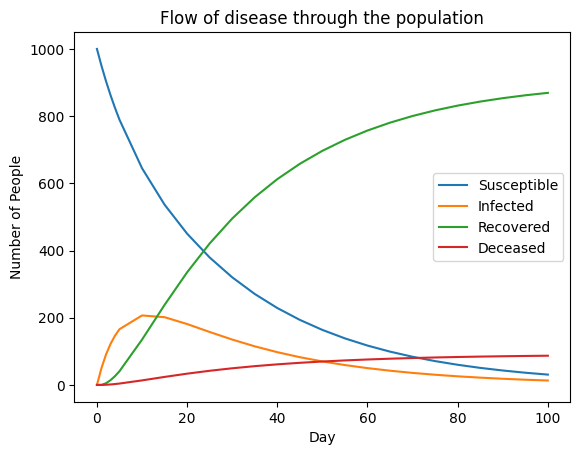

In [28]:
#Plot the results
disease = np.c_[c0, C*c0, C**2 * c0, C**3 * c0, C**4 * c0, C**5 * c0, C**10 * c0, C**15 * c0, C**20 * c0, C**25 * c0, C**30 * c0, C**35 * c0, C**40 * c0, C**45 * c0, C**50 * c0, C**55 * c0, C**60 * c0, C**65 * c0, C**70 * c0, C**75 * c0, C**80 * c0, C**85 * c0, C**90 * c0, C**95 * c0, C**100 * c0]

import matplotlib.pyplot as plt
x  = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
plt.plot(x, np.array(disease[0])[0], label="Susceptible")
plt.plot(x, np.array(disease[1])[0], label="Infected")
plt.plot(x, np.array(disease[2])[0], label="Recovered")
plt.plot(x, np.array(disease[3])[0], label="Deceased")
plt.plot()

plt.xlabel("Day")
plt.ylabel("Number of People")
plt.title("Flow of disease through the population")
plt.legend()
plt.show()

**We can see that the number of infected and susceptible reach about the same level over time and that after around 70-75 days, the death toll exceedes both of them. The nimber of recovered and immune quickly skyrockets and starts to level off. Given the number of recovered and immune as well as the number deceased take away from the number of susceptible, the number who get infected quickly diminishes as these other two rise.**